## Treat training dataset

### import library and initial analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
train_features = pd.read_csv('train_features.csv')
train_features.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [3]:
train_features.shape

(3817, 16)

In [4]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [5]:
train_labels.shape

(3817, 1)

In [6]:
train_features['jumlah_promosi'] = train_labels.copy()

In [7]:
train_features.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [8]:
train_features.shape

(3817, 17)

In [9]:
df = train_features.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [10]:
df.isna().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

### Data Preprocessing

##### Missing Values Exploration

In [11]:
df = df.drop(['tanggal_menjadi_anggota'], axis=1)
df.isna().sum()

tahun_kelahiran         0
pendidikan            189
status_pernikahan     212
pendapatan            190
jumlah_anak_balita    190
jumlah_anak_remaja    204
terakhir_belanja      172
belanja_buah          181
belanja_daging        178
belanja_ikan          193
belanja_kue           214
pembelian_diskon      178
pembelian_web         165
pembelian_toko        169
keluhan               196
jumlah_promosi          0
dtype: int64

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64




In [13]:
df['pendidikan'] = df['pendidikan'].replace('5', np.nan)
df['status_pernikahan'] = df['status_pernikahan'].replace('5', np.nan)

for i in cat_cols:
    print(f'{df[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
Name: status_pernikahan, dtype: int64




In [14]:
def null_statistics(df):
    
    # Create a DataFrame to show column information

    null_info = pd.DataFrame({
        'Column Name': df.columns,
        'Column Data Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        'Null Percentage': df.isnull().mean() * 100
    })

    null_info.reset_index(drop=True, inplace=True)  # Reset the index

    # Display the DataFrame
    
    null_info = null_info[null_info["Null Values"] > 0]
    null_info = null_info.sort_values(by = 'Null Values', ascending = False).reset_index(drop=True)
    
    print("")
    print(f"There are {null_info.shape[0]} columns ({null_info.shape[0] / len(df.columns) * 100:,.2f} %) with Null values out of {len(df.columns)} columns in Dataframe.")
    print("")
    
    return null_info

train_null_data = null_statistics(df)

train_null_data


There are 14 columns (87.50 %) with Null values out of 16 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,belanja_kue,float64,214,5.606497
1,status_pernikahan,object,213,5.580299
2,jumlah_anak_remaja,float64,204,5.344511
3,keluhan,float64,196,5.134923
4,belanja_ikan,float64,193,5.056327
5,pendidikan,object,191,5.003930
6,pendapatan,float64,190,4.977731
7,jumlah_anak_balita,float64,190,4.977731
8,belanja_buah,float64,181,4.741944
9,belanja_daging,float64,178,4.663348


In [15]:
df_description = pd.DataFrame(df.describe().T)
df_description

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0


In [16]:
df_description['skewness'] = df.select_dtypes(include=[np.number]).skew()

In [17]:
df_description

,count,mean,std,min,25%,50%,75%,max,skewness
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0,-0.338147
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0,0.002467
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0,1.142238
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0,0.791618
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0,0.105435
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0,1.699536
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0,1.616782
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0,1.640296
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0,1.694603
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0,1.680927


In [18]:
df_null_handled = df.copy()

In [19]:
#  imputed num columns by KNN

from sklearn.impute import KNNImputer


# Define numerical and categorical columns

num_columns = df_null_handled.select_dtypes(['int64', 'float64']).columns

num_imputer = KNNImputer(n_neighbors=5, weights='distance')
num_imputed_data = num_imputer.fit_transform(df_null_handled[num_columns])
num_imputed_byKNN_df = pd.DataFrame(num_imputed_data, columns=num_columns)

num_imputed_byKNN_df.isna().sum()

tahun_kelahiran       0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

In [20]:
# cek description df imputed by KNN
num_imputed_byKNN_df_desc = num_imputed_byKNN_df.describe().T
num_imputed_byKNN_df_desc['skewness'] = df_null_handled.select_dtypes(include=[np.number]).skew()
num_imputed_byKNN_df_desc

,count,mean,std,min,25%,50%,75%,max,skewness
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1.976000e+03,2000.0,-0.338147
pendapatan,3817.0,1.140144e+08,4.310652e+07,5073000.0,80884034.0,114559000.0,1.495057e+08,332884000.0,0.002467
jumlah_anak_balita,3817.0,2.934268e-01,4.669470e-01,0.0,0.0,0.0,1.000000e+00,2.0,1.142238
jumlah_anak_remaja,3817.0,3.534575e-01,4.833801e-01,0.0,0.0,0.0,1.000000e+00,2.0,0.791618
terakhir_belanja,3817.0,4.699956e+01,2.663804e+01,0.0,25.0,46.0,6.800000e+01,128.0,0.105435
belanja_buah,3817.0,5.975448e+04,7.349052e+04,0.0,8092.0,26299.0,8.698900e+04,396508.0,1.699536
belanja_daging,3817.0,4.388661e+05,5.063839e+05,0.0,50922.0,225061.0,6.841150e+05,3489675.0,1.616782
belanja_ikan,3817.0,8.041962e+04,9.851007e+04,0.0,10115.0,34843.0,1.206280e+05,621600.0,1.640296
belanja_kue,3817.0,6.340326e+04,7.860471e+04,0.0,8046.0,28064.0,9.190600e+04,542164.0,1.694603
pembelian_diskon,3817.0,2.119340e+00,2.062366e+00,0.0,1.0,2.0,3.000000e+00,20.0,1.680927


In [21]:
#  imputed num columns by mean

num_columns = df_null_handled.select_dtypes(['int64', 'float64']).columns

num_imputed_byMean_df = df_null_handled[num_columns].fillna(df_null_handled[num_columns].mean())
num_imputed_byMean_df.isna().sum()

tahun_kelahiran       0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

In [22]:
# cek description df imputed by mean
num_imputed_byMean_df_desc = num_imputed_byMean_df.describe().T
num_imputed_byMean_df_desc['skewness'] = df_null_handled.select_dtypes(include=[np.number]).skew()
num_imputed_byMean_df_desc

,count,mean,std,min,25%,50%,75%,max,skewness
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1.968000e+03,1976.0,2000.0,-0.338147
pendapatan,3817.0,1.144832e+08,4.236466e+07,5073000.0,82608533.0,1.144832e+08,147953453.0,332884000.0,0.002467
jumlah_anak_balita,3817.0,2.930797e-01,4.611353e-01,0.0,0.0,0.000000e+00,1.0,2.0,1.142238
jumlah_anak_remaja,3817.0,3.537227e-01,4.796548e-01,0.0,0.0,0.000000e+00,1.0,2.0,0.791618
terakhir_belanja,3817.0,4.723155e+01,2.645144e+01,0.0,25.0,4.723155e+01,68.0,128.0,0.105435
belanja_buah,3817.0,5.980424e+04,7.224808e+04,0.0,8092.0,3.034500e+04,81740.0,396508.0,1.699536
belanja_daging,3817.0,4.385748e+05,4.999578e+05,0.0,52598.0,2.495720e+05,640394.0,3489675.0,1.616782
belanja_ikan,3817.0,8.142900e+04,9.741520e+04,0.0,10337.0,4.067000e+04,115037.0,621600.0,1.640296
belanja_kue,3817.0,6.337797e+04,7.717597e+04,0.0,8092.0,3.236800e+04,84522.0,542164.0,1.694603
pembelian_diskon,3817.0,2.125584e+00,2.050567e+00,0.0,1.0,2.000000e+00,3.0,20.0,1.680927


In [23]:
# impute categorical cols by mode

cat_columns = df_null_handled.select_dtypes(['object']).columns

for col in cat_columns:
    df_null_handled[col].fillna(df[col].mode()[0], inplace=True)

df_null_handled.isna().sum()

tahun_kelahiran         0
pendidikan              0
status_pernikahan       0
pendapatan            190
jumlah_anak_balita    190
jumlah_anak_remaja    204
terakhir_belanja      172
belanja_buah          181
belanja_daging        178
belanja_ikan          193
belanja_kue           214
pembelian_diskon      178
pembelian_web         165
pembelian_toko        169
keluhan               196
jumlah_promosi          0
dtype: int64

In [24]:
# df null handled by mode and knn = df_mk
df_null_handled[num_columns] = num_imputed_byKNN_df
df_mk = df_null_handled.copy()

df_mk.isna().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

In [25]:
# df null handled by mode and knn = df_mm
df_null_handled[num_columns] = num_imputed_byMean_df
df_mm = df_null_handled.copy()

df_mm.isna().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

#### Duplicate Values Exploration

In [180]:
df_mk.shape

(3817, 16)

In [181]:
df_mk.duplicated().sum()

0

In [28]:
df_mm.duplicated().sum()

0

#### Outliers Exploration

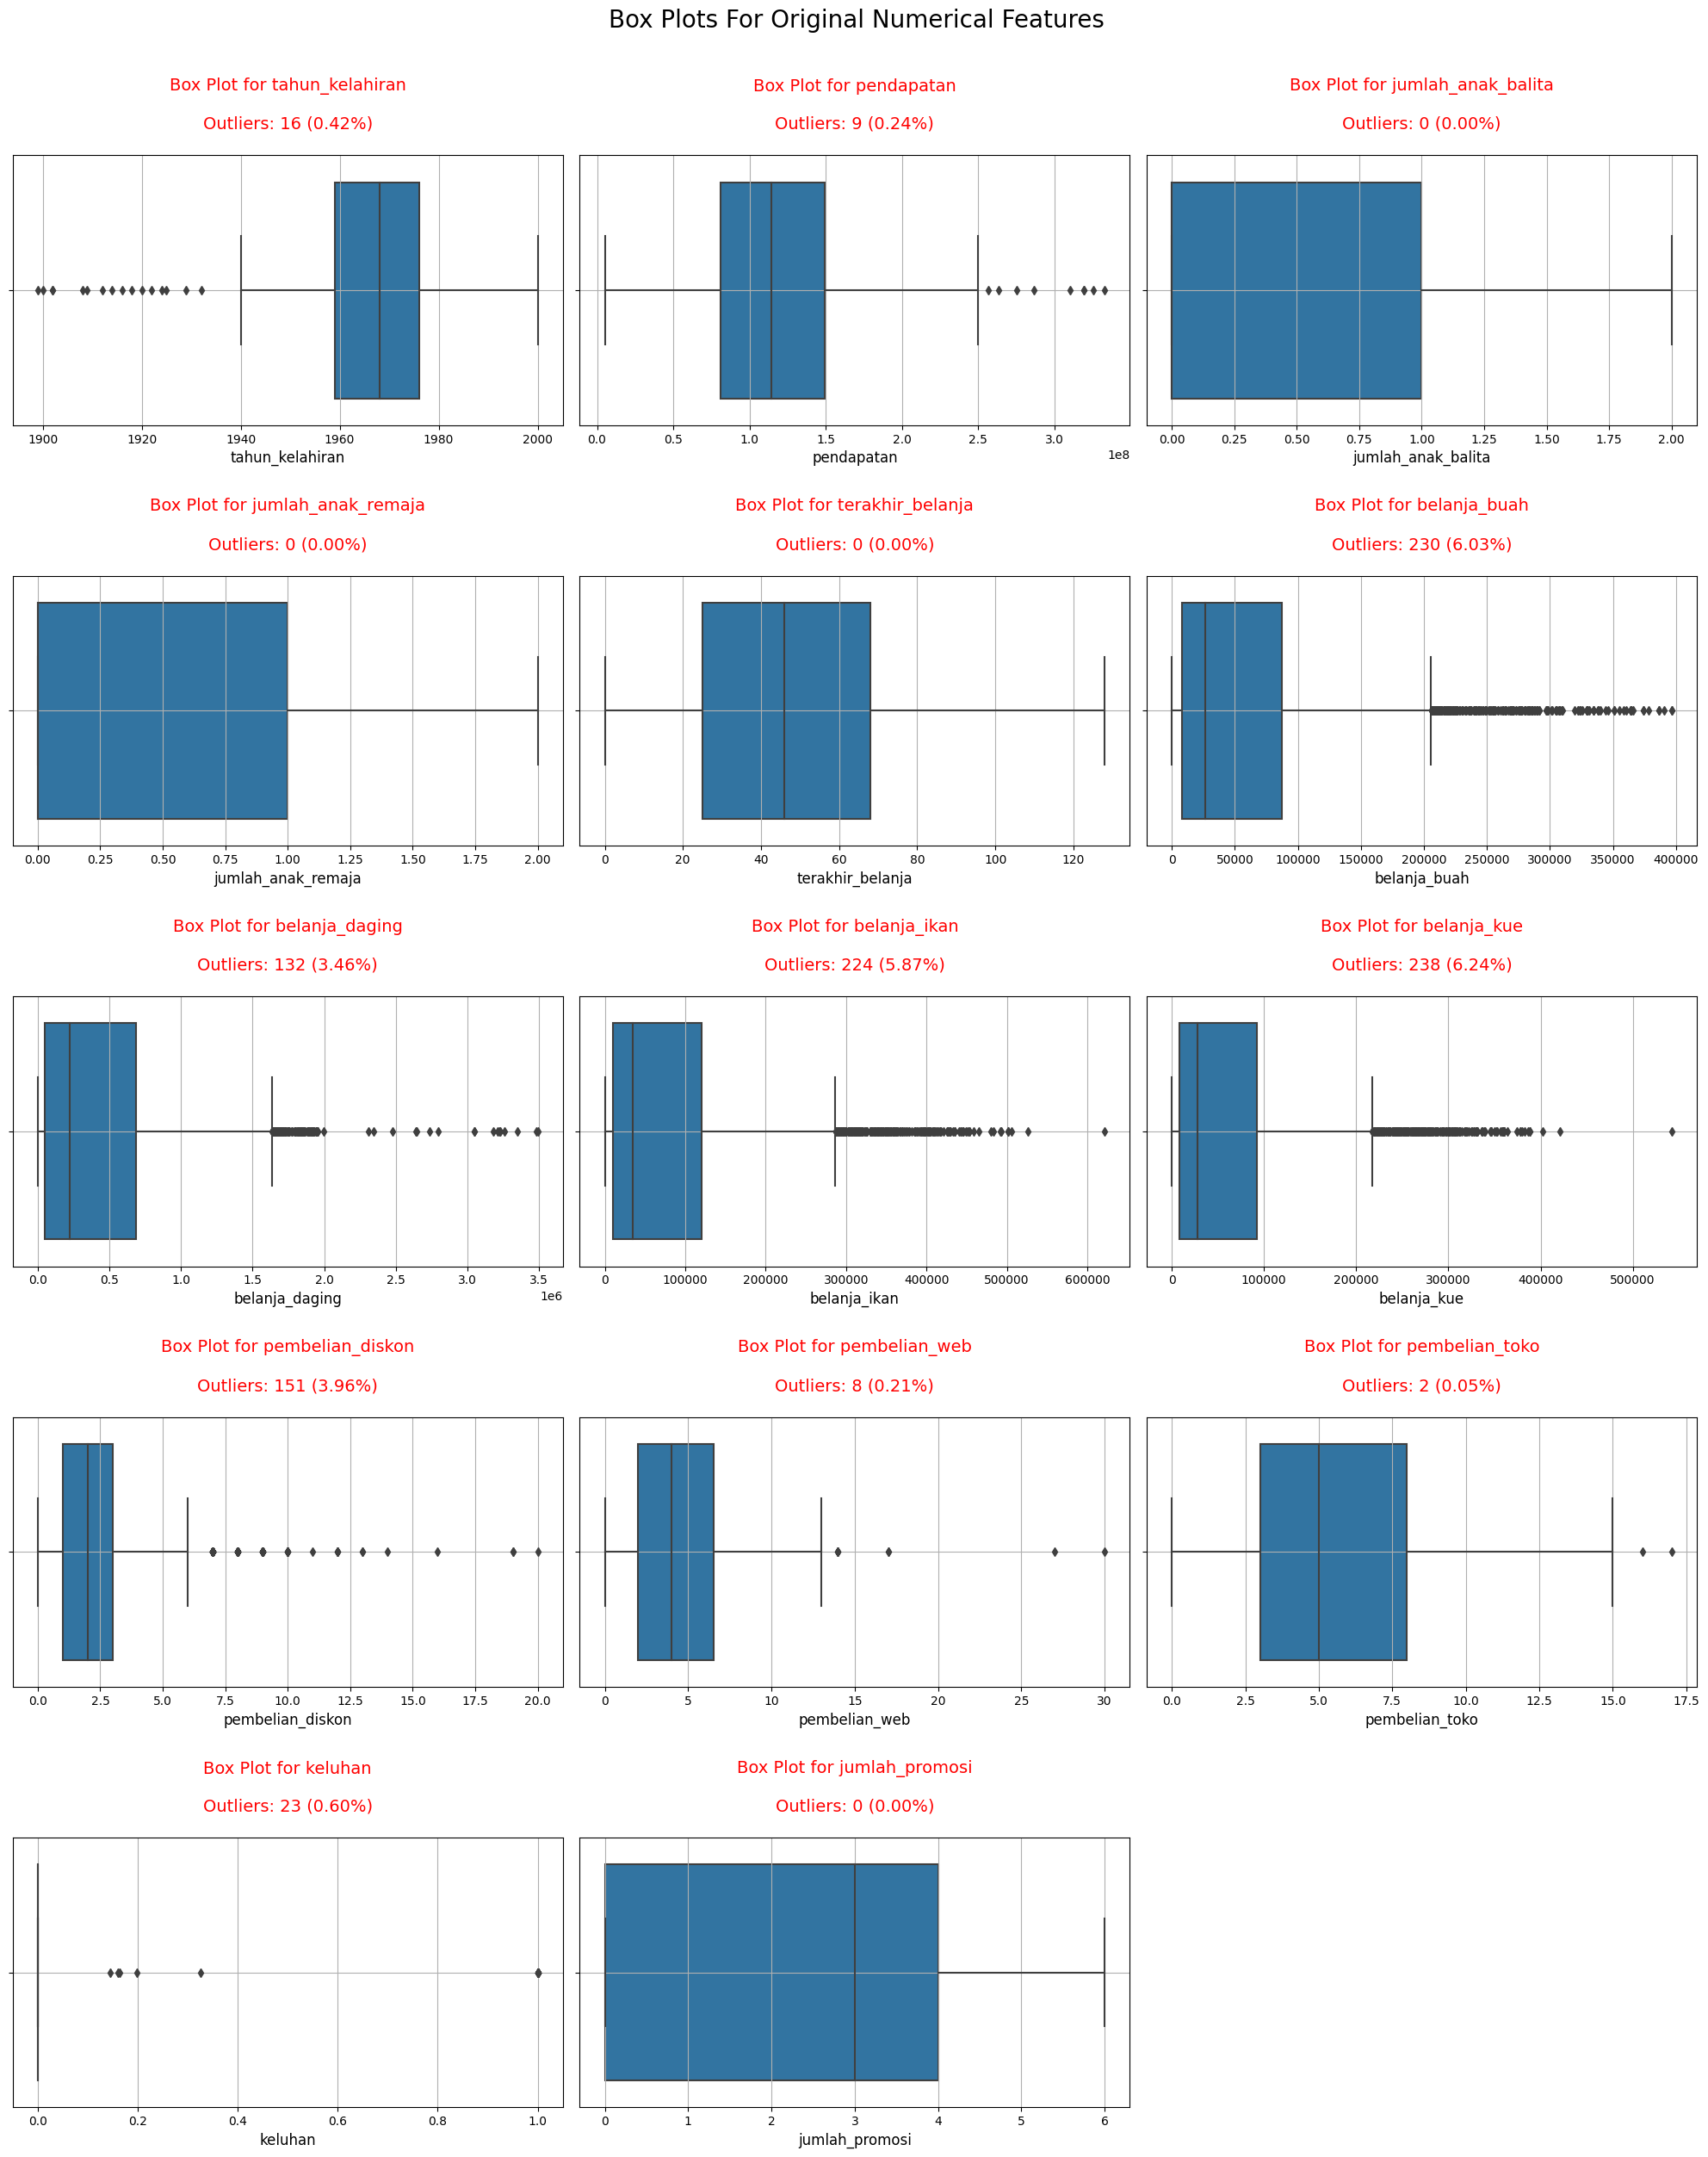

In [29]:
# Select numerical columns from df_mk

numerical_columns = df_mk.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Original Numerical Features", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_mk[col].quantile(0.25)
    Q3 = df_mk[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_mk[col] < Q1 - 1.5 * IQR) | (df_mk[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_mk)) * 100
    
    sns.boxplot(x=df_mk[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

In [30]:
# pada kolom tahun_kelahiran, hapus outlier karena agaknya aneh jika terdapat orang di data tersebut yang lahir pada 100 tahun yang lalu

Q1 = df_mk['tahun_kelahiran'].quantile(0.25)
Q3 = df_mk['tahun_kelahiran'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan nilai tahun_kelahiran di luar batas bawah dan batas atas
df_mk_filtered = df_mk[(df_mk['tahun_kelahiran'] >= lower_bound) & (df_mk['tahun_kelahiran'] <= upper_bound)]

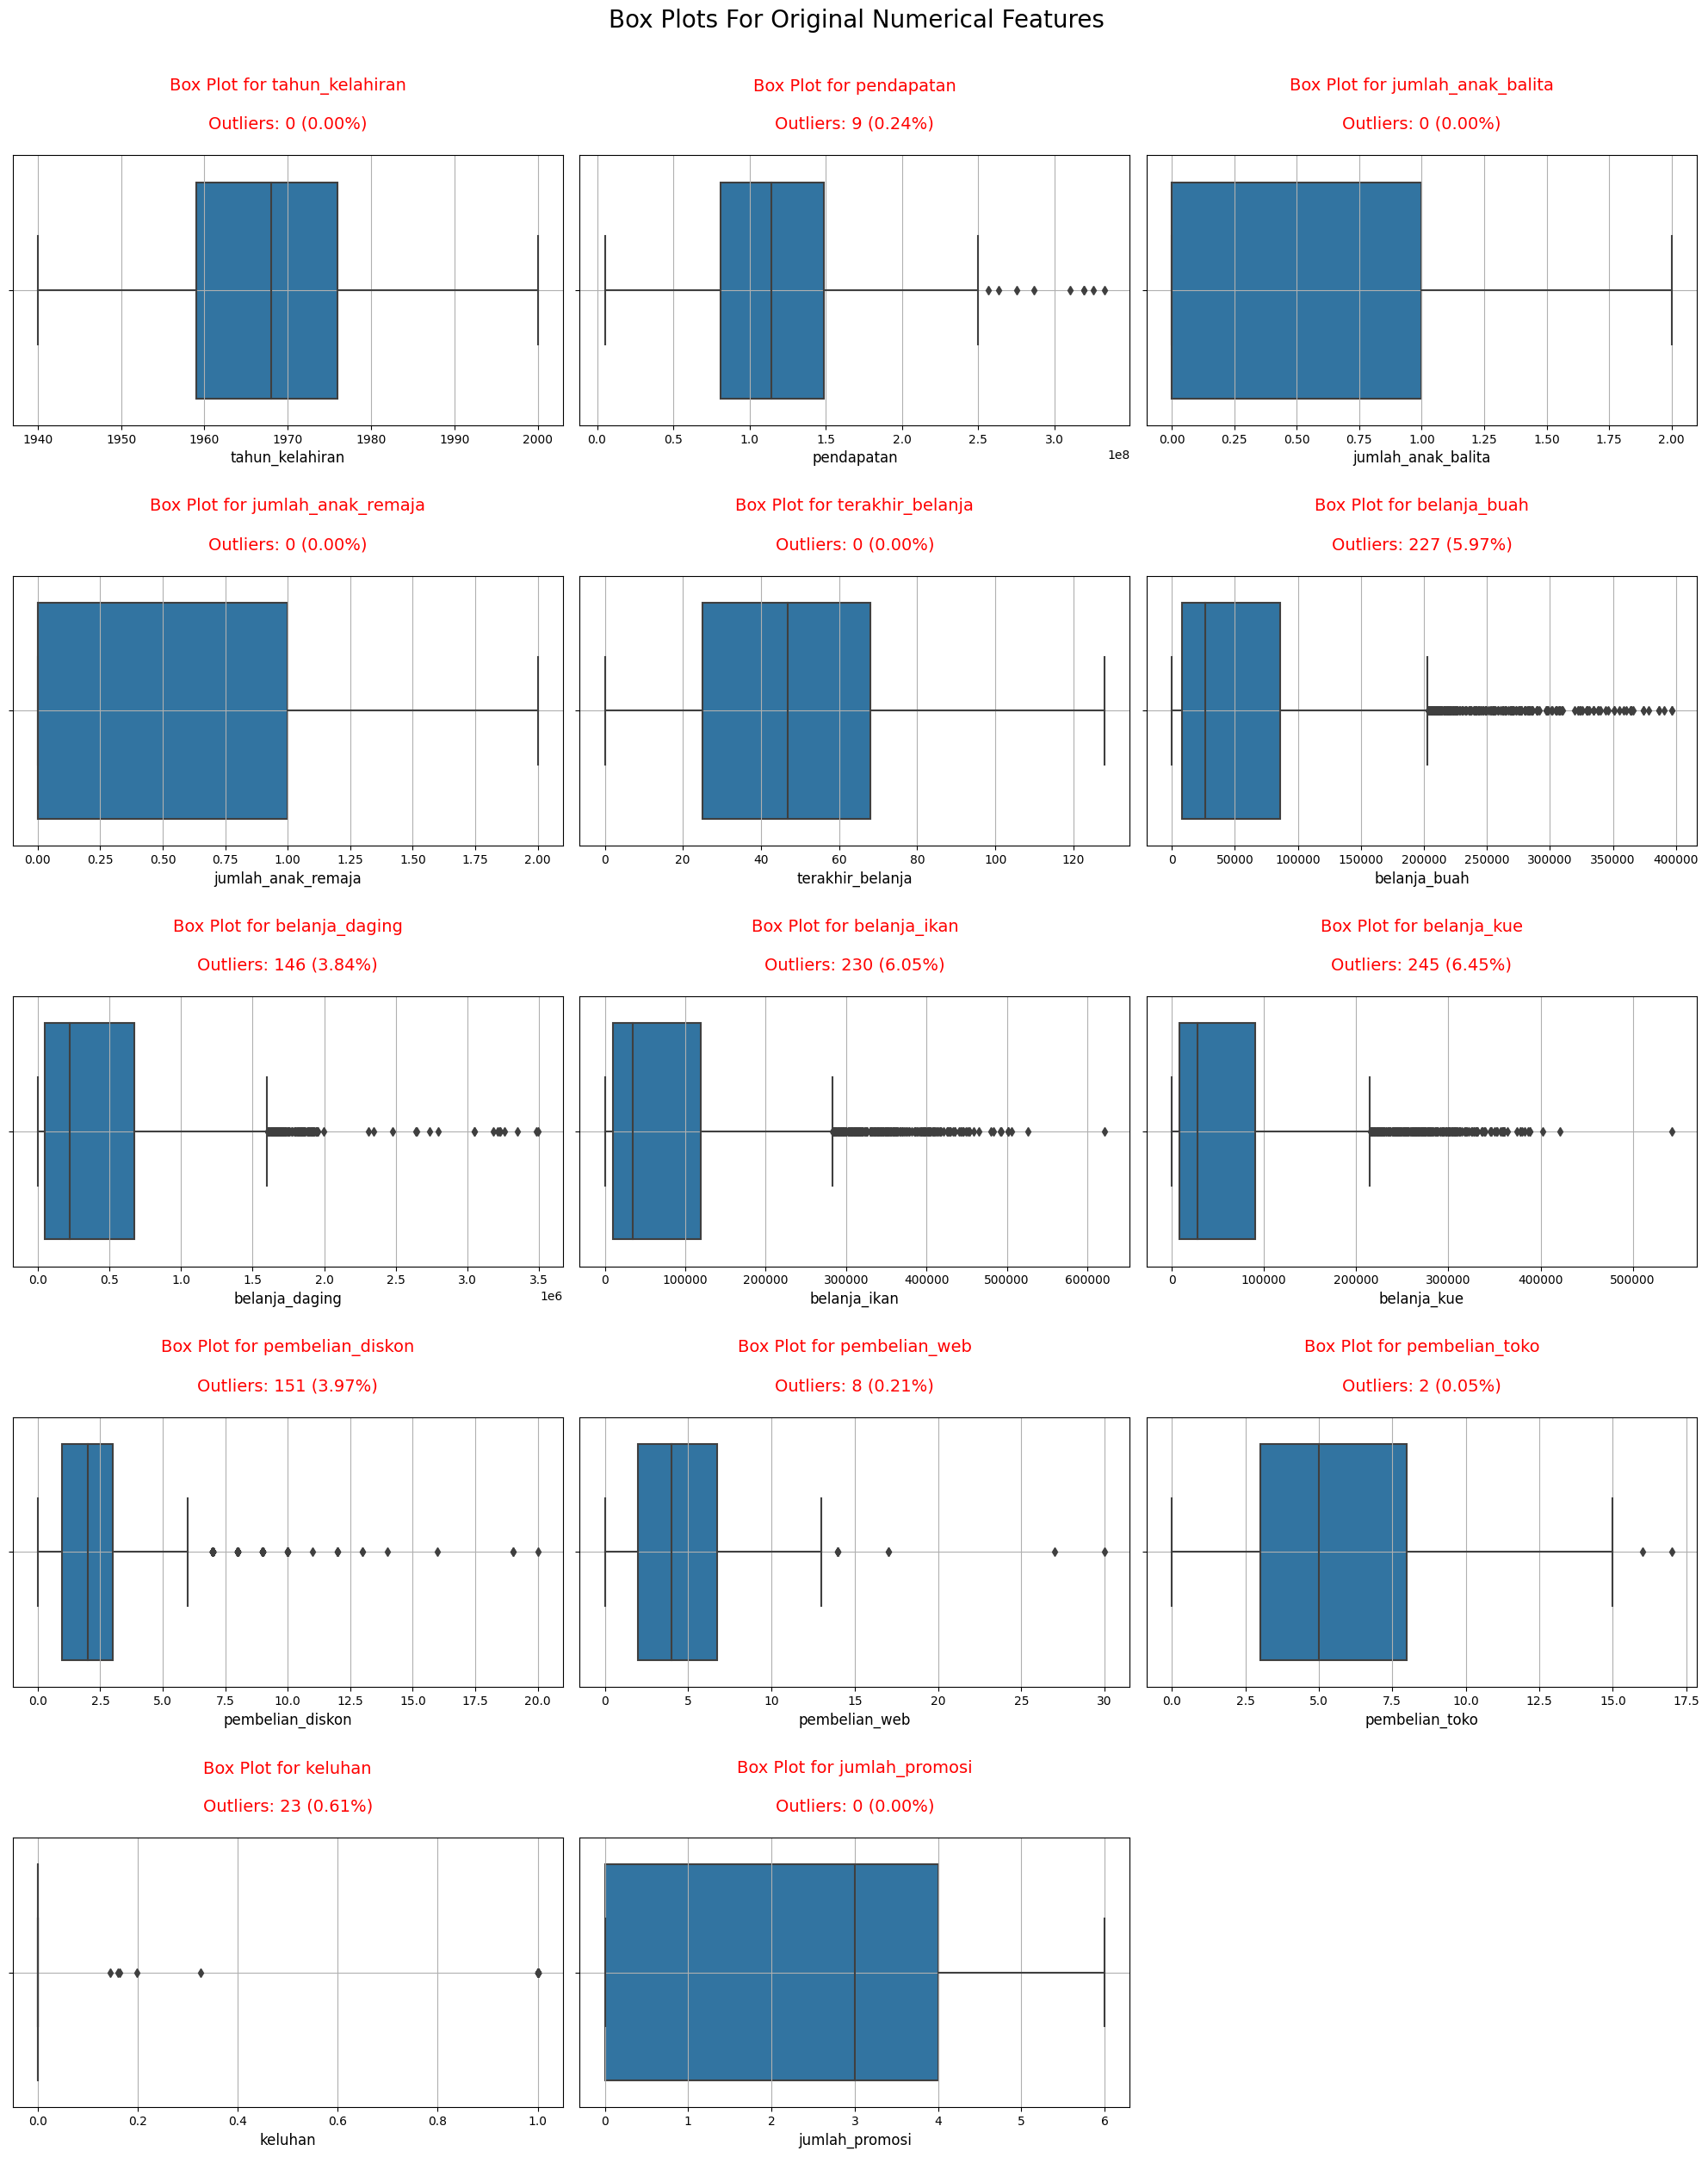

In [31]:
# Select numerical columns from df_mk_filtered

numerical_columns = df_mk_filtered.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Original Numerical Features", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_mk_filtered[col].quantile(0.25)
    Q3 = df_mk_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_mk_filtered[col] < Q1 - 1.5 * IQR) | (df_mk_filtered[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_mk_filtered)) * 100
    
    sns.boxplot(x=df_mk_filtered[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

#### Fix Possible Wrong Input

In [32]:
df_mk_filtered['jumlah_anak_balita'].value_counts()

0.000000    2643
1.000000    1008
2.000000      30
0.532691       1
0.147981       1
            ... 
0.748431       1
0.407837       1
0.170675       1
0.765094       1
0.109290       1
Name: jumlah_anak_balita, Length: 123, dtype: int64

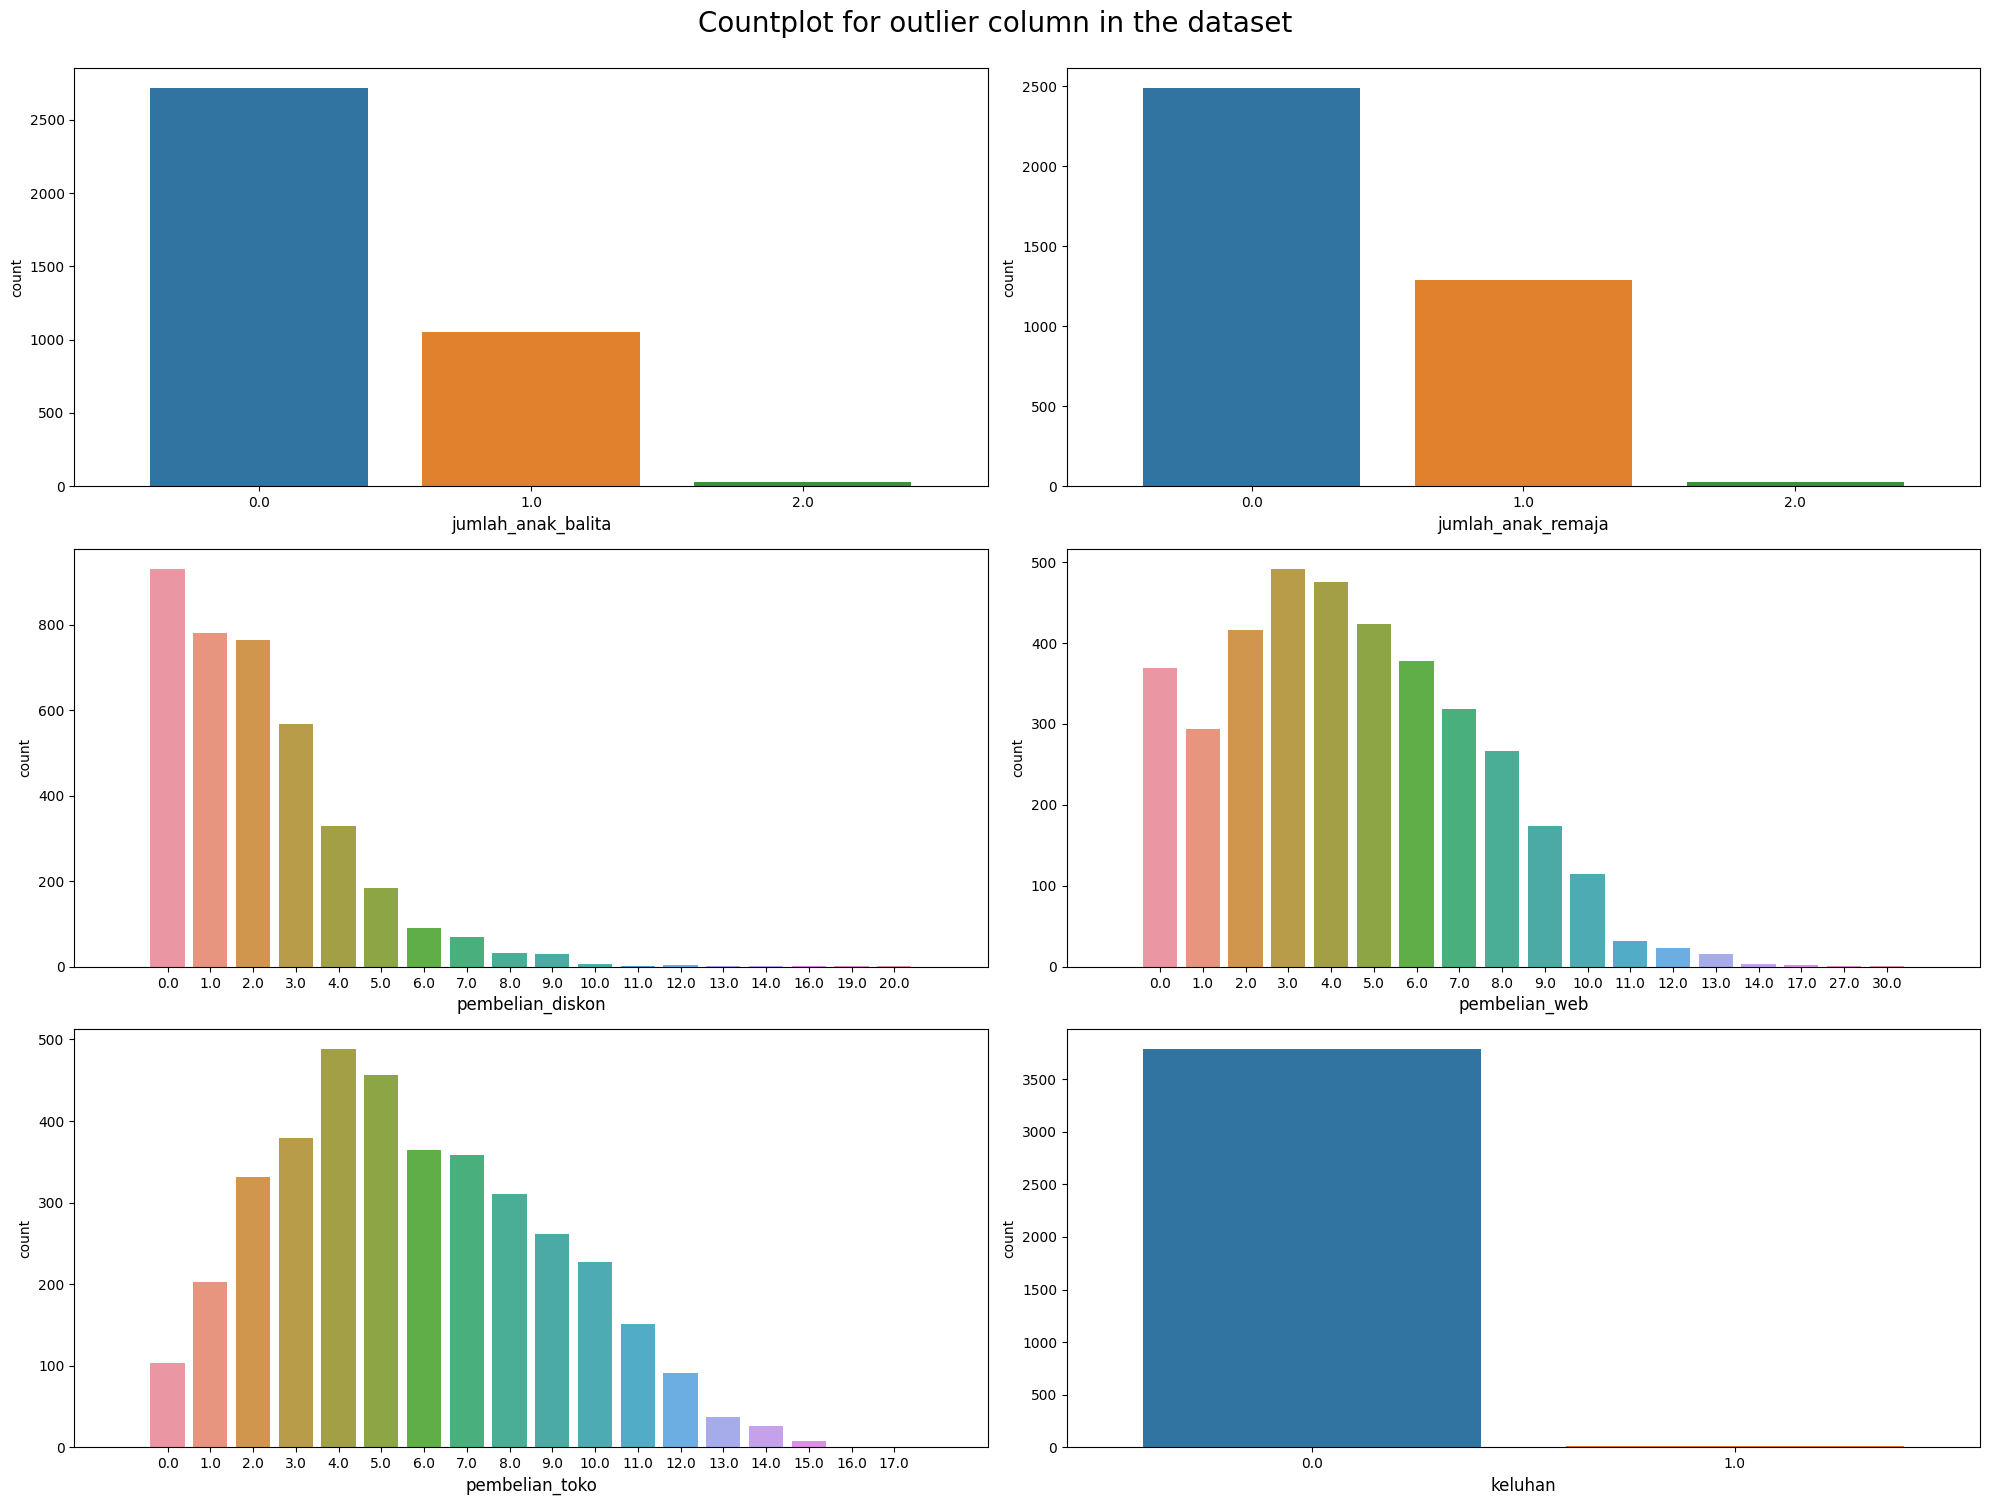

In [33]:
# pembulatan input yang salah
def round_value(value):
    if value % 1 < 0.5:
        return int(np.floor(value))
    else:
        return int(np.ceil(value))
    

# visualize updated data
def show_countplot(data):
  possible_wrong_input_cols = data[['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']]
  num_cols = 2
  num_rows = (possible_wrong_input_cols.shape[1] + num_cols -1 ) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

  # Add a main title to the entire set of subplots
  fig.suptitle("Countplot for outlier column in the dataset", y=1, fontsize=20)


  for i, col in enumerate(possible_wrong_input_cols):

      # Calculate current row and column for the subplot
      row_idx = i // num_cols
      col_idx = i % num_cols

      pic = sns.countplot(possible_wrong_input_cols, x=col, ax=axes[row_idx, col_idx])
      axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
      pic.margins(x=0.1)

  # Remove any empty subplots
  for i in range(len(possible_wrong_input_cols.columns), num_rows * num_cols):
      fig.delaxes(axes.flatten()[i])

  # Adjust layout
  plt.tight_layout()
  plt.show()


possible_wrong_input_cols = ['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']

for col in possible_wrong_input_cols:
    df_mk_filtered[col] = df_mk_filtered[col].apply(lambda x: round_value(x))
    
show_countplot(df_mk_filtered)

#### Imbalance Data Exploration

In [34]:
df_mk_filtered.isna().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

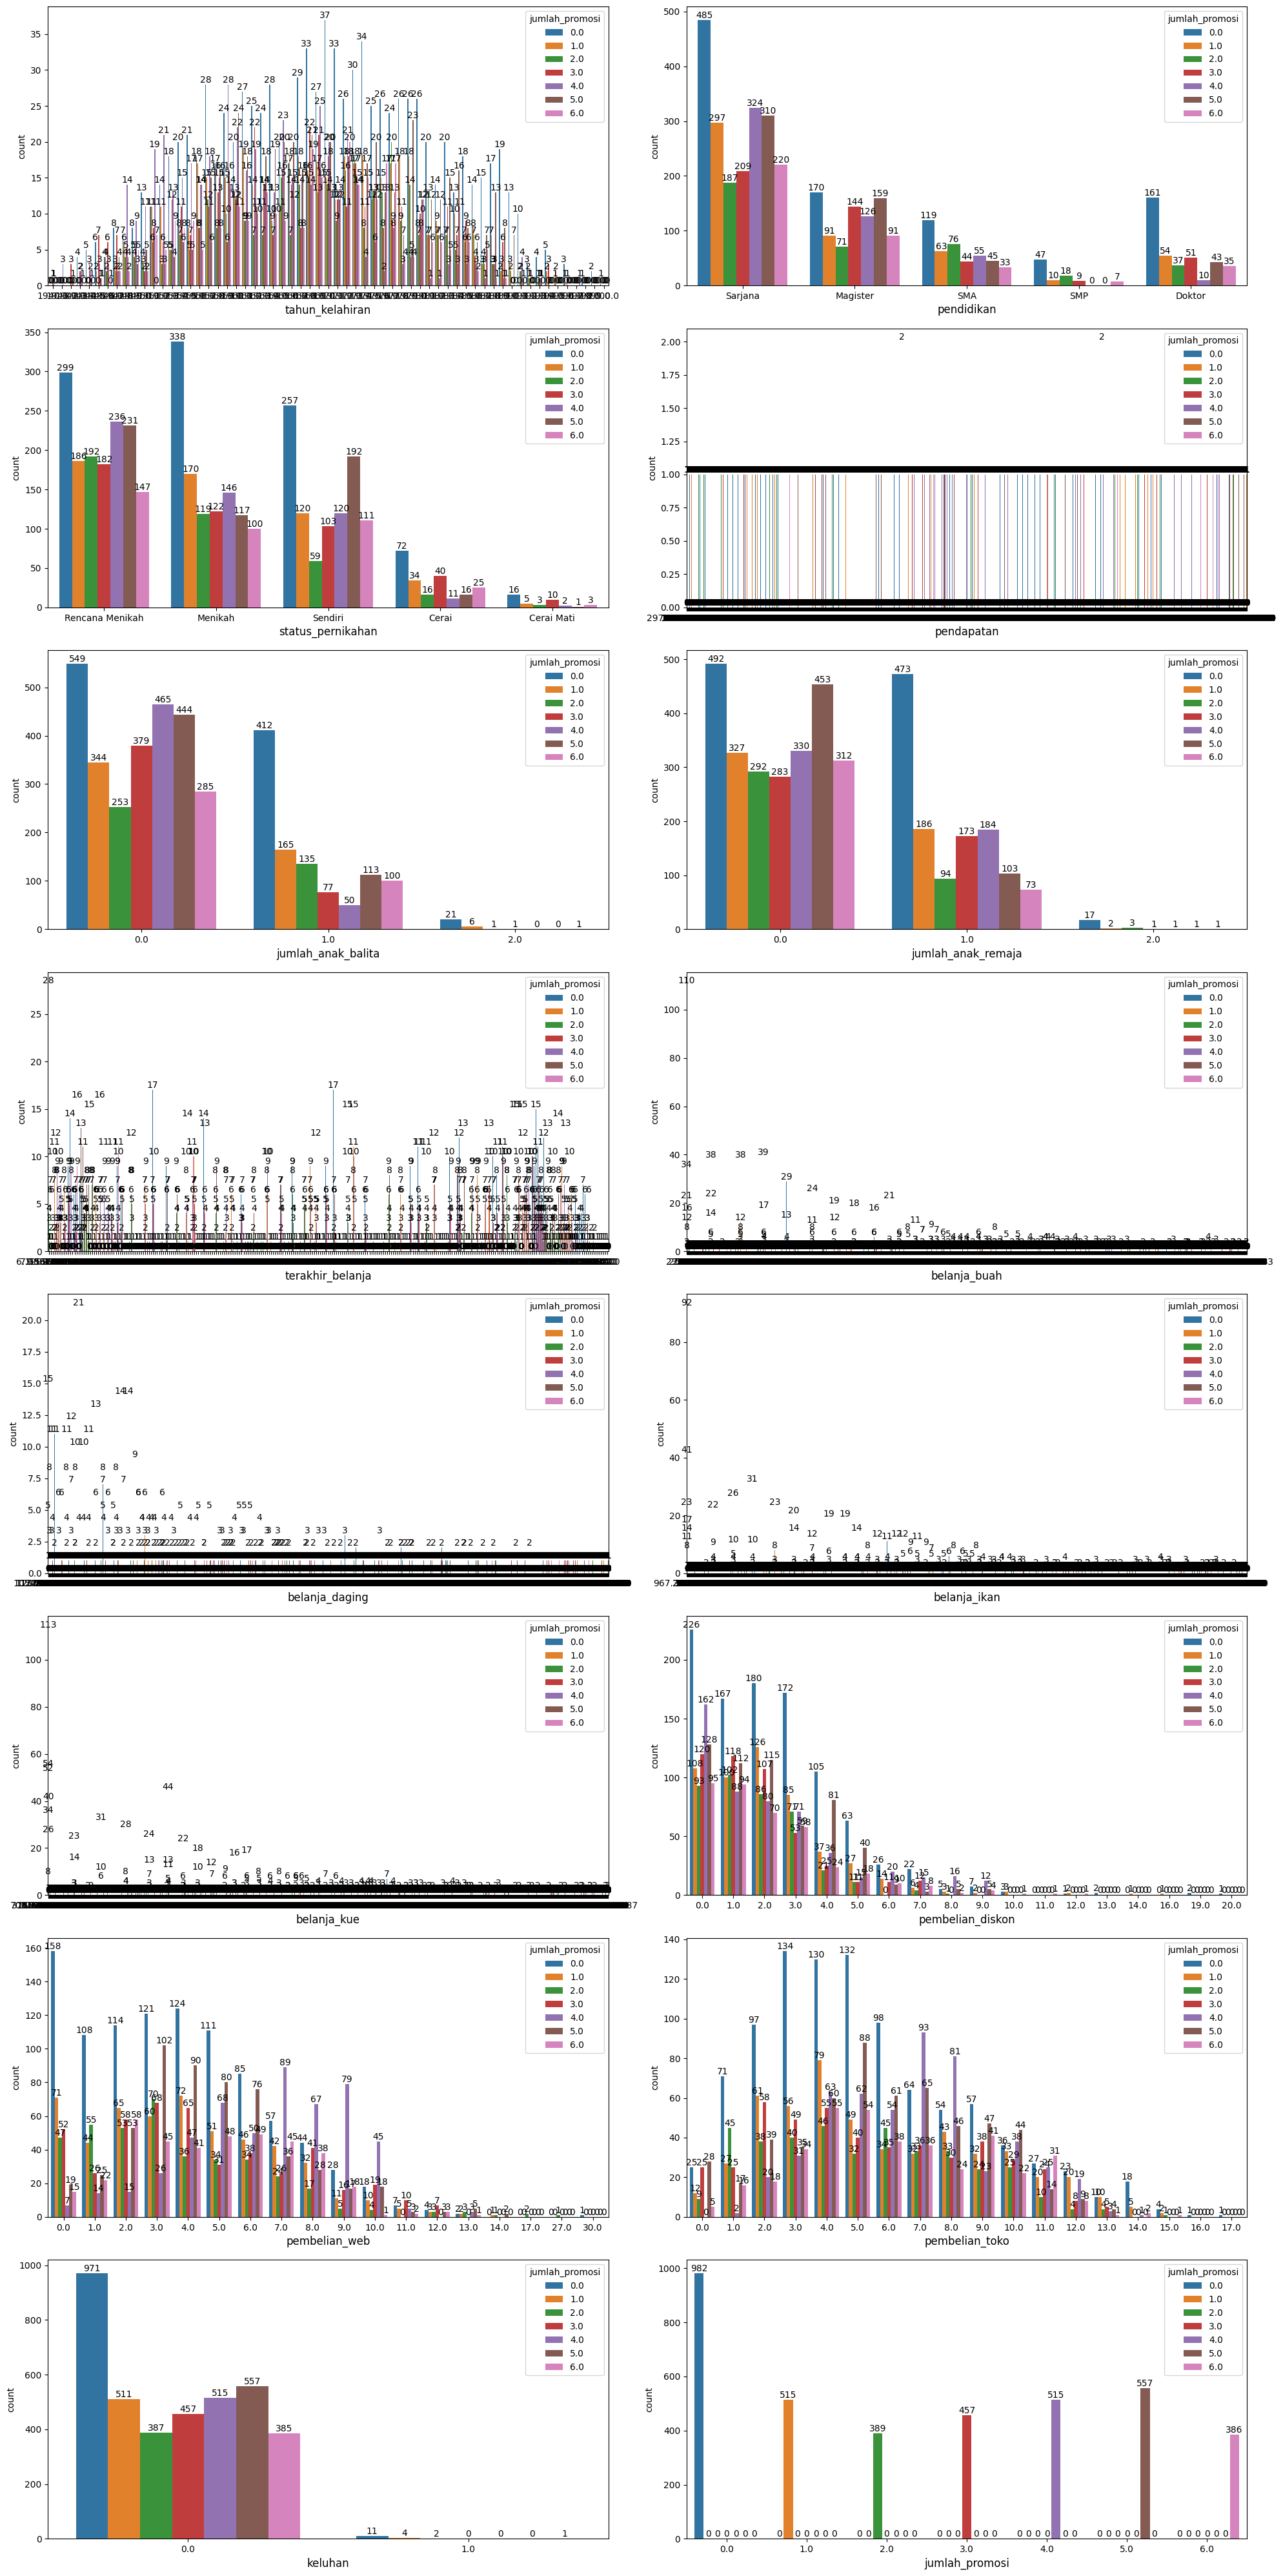

In [35]:
num_cols = 2
num_rows = (df_mk_filtered.shape[1] + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))



for i, col in enumerate(df_mk_filtered):
    # Calculate current row and column for the subplot
    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axes[row_idx, col_idx]
    sns.countplot(x=col, hue='jumlah_promosi', data=df_mk_filtered, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    total = len(df_mk_filtered[col])
    for p in ax.patches:
        jumlah = round(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(jumlah, (x, y), ha='center', va='bottom')

# Remove any empty subplots
for i in range(len(df_mk_filtered.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


data terlihat cukup balanced

#### Encode Categorical Data

In [36]:
cat_cols = df_mk_filtered.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df_mk_filtered[i].value_counts()}')
    print('\n')

Sarjana     2032
Magister     852
SMA          435
Doktor       391
SMP           91
Name: pendidikan, dtype: int64


Rencana Menikah    1473
Menikah            1112
Sendiri             962
Cerai               214
Cerai Mati           40
Name: status_pernikahan, dtype: int64




In [37]:
def apply_custom_ordinal_encoding_mappings(df, default_value = 0):
    
    ordinal_encoding_columns_mappings = {
    
        'pendidikan': {'SMP': 1, 'SMA': 2, 'Sarjana': 3, 'Magister': 4, 'Doktor': 5},
        'status_pernikahan': {'Sendiri': 1, 'Rencana Menikah': 2, 'Menikah': 3, 'Cerai': 4, 'Cerai Mati': 5}
    }
    
    for col, mapping in ordinal_encoding_columns_mappings.items():
        
        if col in df.columns:
            
            df[col] = df[col].map(mapping).fillna(default_value)
        
    return df

In [38]:
df_mk_filtered[cat_cols] = apply_custom_ordinal_encoding_mappings(df_mk_filtered[cat_cols])
for i in cat_cols:
    print(f'{df_mk_filtered[i].value_counts()}')
    print('\n')

3    2032
4     852
2     435
5     391
1      91
Name: pendidikan, dtype: int64


2    1473
3    1112
1     962
4     214
5      40
Name: status_pernikahan, dtype: int64




In [39]:
df_mk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3801 non-null   float64
 1   pendidikan          3801 non-null   int64  
 2   status_pernikahan   3801 non-null   int64  
 3   pendapatan          3801 non-null   float64
 4   jumlah_anak_balita  3801 non-null   float64
 5   jumlah_anak_remaja  3801 non-null   float64
 6   terakhir_belanja    3801 non-null   float64
 7   belanja_buah        3801 non-null   float64
 8   belanja_daging      3801 non-null   float64
 9   belanja_ikan        3801 non-null   float64
 10  belanja_kue         3801 non-null   float64
 11  pembelian_diskon    3801 non-null   float64
 12  pembelian_web       3801 non-null   float64
 13  pembelian_toko      3801 non-null   float64
 14  keluhan             3801 non-null   float64
 15  jumlah_promosi      3801 non-null   float64
dtypes: flo

### Exploratory Data Analysis

#### Statistics Summary

In [40]:
df_mk_filtered_desc = df_mk_filtered.describe().T
df_mk_filtered_desc['skewness'] = df_mk_filtered.select_dtypes(include=[np.number]).skew()
df_mk_filtered_desc['range'] = np.ptp(df_mk_filtered.select_dtypes(include=[np.number]), axis=0)
df_mk_filtered_desc

,count,mean,std,min,25%,50%,75%,max,skewness,range
tahun_kelahiran,3801.0,1.968048e+03,1.125222e+01,1940.0,1959.0,1.968000e+03,1976.0,2000.0,0.049103,60.0
pendidikan,3801.0,3.267561e+00,8.800255e-01,1.0,3.0,3.000000e+00,4.0,5.0,0.147572,4.0
status_pernikahan,3801.0,2.183636e+00,9.121724e-01,1.0,1.0,2.000000e+00,3.0,5.0,0.408168,4.0
pendapatan,3801.0,1.137968e+08,4.305365e+07,5073000.0,80732848.0,1.142210e+08,148952989.0,332884000.0,0.023147,327811000.0
jumlah_anak_balita,3801.0,2.925546e-01,4.720279e-01,0.0,0.0,0.000000e+00,1.0,2.0,1.135889,2.0
jumlah_anak_remaja,3801.0,3.520126e-01,4.917763e-01,0.0,0.0,0.000000e+00,1.0,2.0,0.791879,2.0
terakhir_belanja,3801.0,4.700587e+01,2.667633e+01,0.0,25.0,4.681957e+01,68.0,128.0,0.121783,128.0
belanja_buah,3801.0,5.903159e+04,7.266166e+04,0.0,8092.0,2.629900e+04,86201.0,396508.0,1.705073,396508.0
belanja_daging,3801.0,4.362310e+05,5.053819e+05,0.0,50759.0,2.238530e+05,671964.0,3489675.0,1.628290,3489675.0
belanja_ikan,3801.0,8.007169e+04,9.852014e+04,0.0,10115.0,3.439100e+04,119357.0,621600.0,1.672601,621600.0


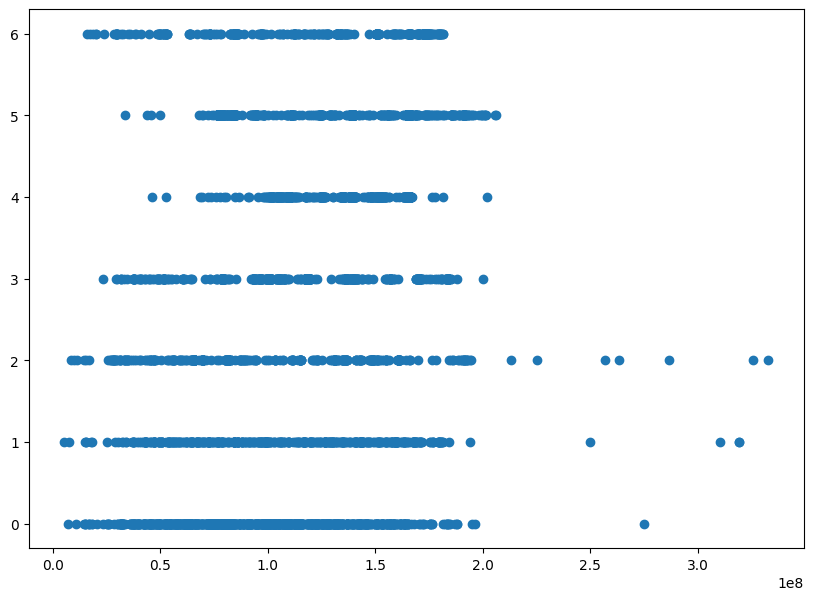

In [41]:
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.scatter(df_mk_filtered['pendapatan'], df_mk_filtered['jumlah_promosi'])
 
# Show Plot
plt.show()

#### Correlation Exploration

In [42]:
df_mk_filtered

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
0,1979.0,3,2,1.069409e+08,0.0,1.0,24.747561,50575.0,260967.0,50575.000000,20230.000000,2.0,2.0,5.0,0.0,2.0
1,1950.0,3,2,8.406300e+07,0.0,0.0,70.000000,6069.0,44506.0,80920.000000,20230.000000,9.0,6.0,4.0,0.0,0.0
2,1966.0,3,3,1.275326e+08,0.0,0.0,45.000000,117611.0,265460.0,96341.000000,145573.000000,1.0,1.0,7.0,0.0,1.0
3,1961.0,4,2,1.655796e+08,0.0,0.0,90.000000,206346.0,1613901.0,27725.000000,125868.000000,0.0,7.0,8.0,0.0,4.0
4,1970.0,3,2,1.177032e+08,1.0,1.0,78.000000,90563.0,311757.0,40358.000000,33875.000000,7.0,6.0,5.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,4,3,7.819947e+07,0.0,0.0,33.000000,6069.0,25977.0,3856.000000,5784.000000,5.0,1.0,0.0,0.0,5.0
3813,1947.0,5,2,1.093060e+08,0.0,1.0,44.000000,0.0,50575.0,9135.005335,0.000000,3.0,6.0,3.0,0.0,1.0
3814,1974.0,4,3,1.046210e+08,0.0,2.0,68.000000,2023.0,62713.0,8092.000000,0.000000,7.0,5.0,7.0,0.0,0.0
3815,1957.0,2,2,1.108500e+08,1.0,1.0,67.000000,18207.0,70805.0,24276.000000,16293.251577,4.0,5.0,4.0,0.0,0.0


In [123]:
df_mk_filtered['terakhir_belanja'].value_counts()

48.000000    57
39.000000    54
23.000000    53
27.000000    52
25.000000    50
             ..
39.283889     1
40.669303     1
38.563362     1
11.228169     1
44.735512     1
Name: terakhir_belanja, Length: 285, dtype: int64

In [124]:
def round_value2(value):
    if value % 1 < 0.5:
        return int(np.floor(value))
    else:
        return int(np.ceil(value))

In [125]:
df_mk_filtered['terakhir_belanja'] = df_mk_filtered['terakhir_belanja'].apply(lambda x: round_value2(x))
df_mk_filtered['terakhir_belanja'].value_counts()

39     62
48     59
27     57
25     55
30     54
       ..
128     1
108     1
122     1
112     1
124     1
Name: terakhir_belanja, Length: 113, dtype: int64

In [132]:
import datetime

now = datetime.datetime.now()
current_year = now.year

df_mk_filtered['usia'] = current_year - df_mk_filtered['terakhir_belanja']


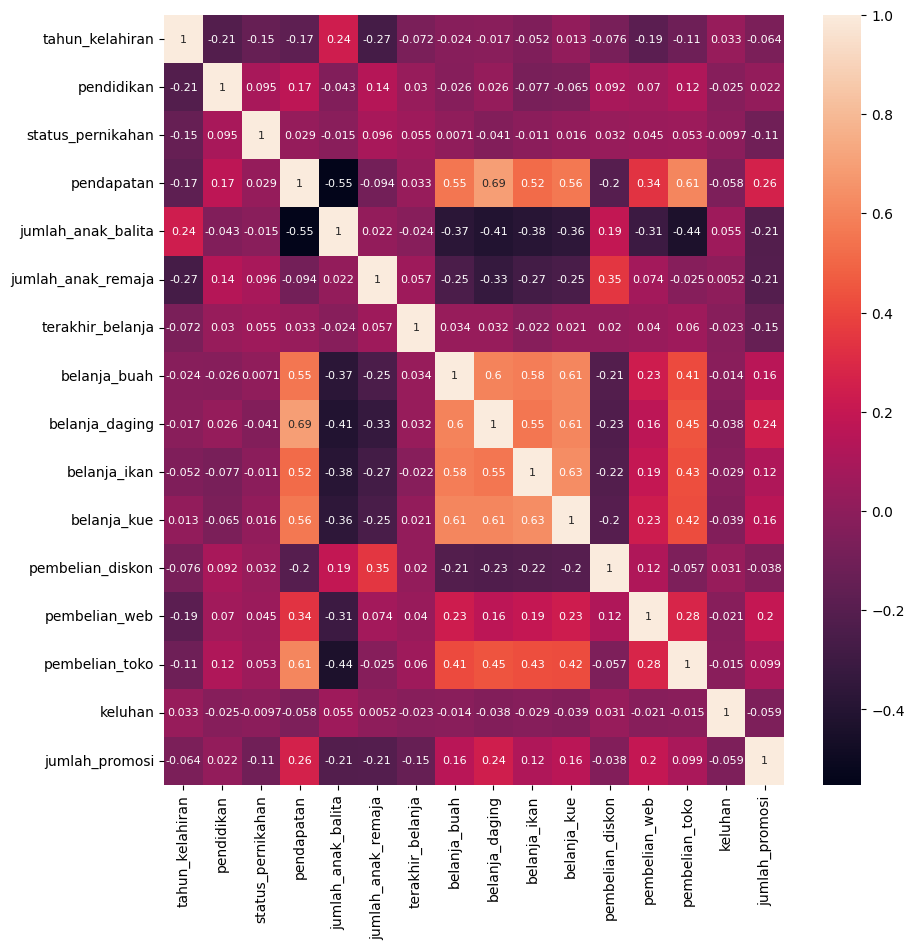

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mk_filtered.corr(),annot=True, annot_kws={"fontsize": 8})
plt.show()

#### Feature Scalling

In [158]:
from sklearn.preprocessing import RobustScaler

feature_selected = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan','pembelian_diskon', 'belanja_kue', 'pembelian_web', 'pembelian_toko']
feature_df = df_mk_filtered[feature_selected].copy()
target_df = df_mk_filtered['jumlah_promosi'].copy()

# Fit and transform features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(feature_df)

# Convert scaled features array to DataFrame
scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_selected)

# Fit and transform target
target_scaler = RobustScaler()
scaled_target = target_scaler.fit_transform(target_df.values.reshape(-1, 1))

# Convert scaled target array to DataFrame
scaled_target_df = pd.DataFrame(scaled_target, columns=['jumlah_promosi'])

scaled_feature_df


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,pembelian_diskon,belanja_kue,pembelian_web,pembelian_toko
0,0.647059,0.0,0.0,-0.106715,0.0,1.0,-0.511628,0.310796,0.059745,0.148148,0.0,-0.089920,-0.4,0.0
1,-1.058824,0.0,0.0,-0.442069,0.0,0.0,0.534884,-0.258997,-0.288708,0.425926,3.5,-0.089920,0.4,-0.2
2,-0.117647,0.0,0.5,0.195127,0.0,0.0,-0.046512,1.169033,0.066978,0.567090,-0.5,1.423153,-0.6,0.4
3,-0.411765,1.0,0.0,0.752837,0.0,0.0,1.000000,2.305074,2.237664,-0.061020,-1.0,1.185285,0.6,0.6
4,0.117647,0.0,0.0,0.051043,1.0,1.0,0.720930,0.822748,0.141506,0.054622,2.5,0.074795,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,-0.764706,1.0,0.5,-0.528019,0.0,0.0,-0.325581,-0.258997,-0.318536,-0.279517,1.5,-0.264305,-0.6,-1.0
3797,-1.235294,2.0,0.0,-0.072046,0.0,1.0,-0.069767,-0.336696,-0.278939,-0.231193,0.5,-0.334126,0.4,-0.4
3798,0.352941,1.0,0.5,-0.140721,0.0,2.0,0.488372,-0.310796,-0.259399,-0.240741,2.5,-0.334126,0.2,0.4
3799,-0.647059,-1.0,0.0,-0.049414,1.0,1.0,0.465116,-0.103599,-0.246373,-0.092593,1.0,-0.137443,0.2,-0.2


In [159]:
scaled_target_df

,jumlah_promosi
0,-0.25
1,-0.75
2,-0.50
3,0.25
4,0.25
...,...
3796,0.50
3797,-0.50
3798,-0.75
3799,-0.75


### Modelling

#### Model and Evaluation

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [179]:
X = scaled_feature_df.copy()
y = target_df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression = LogisticRegression()
RidgeClassifier = RidgeClassifier()
SGDClassifier = SGDClassifier(loss='log')  
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
BaggingClassifier = BaggingClassifier()
ExtraTreesClassifier = ExtraTreesClassifier()
AdaBoostClassifier = AdaBoostClassifier()
GradientBoostingClassifier = GradientBoostingClassifier()
KNeighborsClassifier = KNeighborsClassifier()
svc = SVC(probability=True) 
XGBClassifier = XGBClassifier()
LGBMClassifier = LGBMClassifier()
CatBoostClassifier = CatBoostClassifier(verbose=0)


LogisticRegression = LogisticRegression.fit(X_train, y_train)
RidgeClassifier = RidgeClassifier.fit(X_train, y_train)
SGDClassifier = SGDClassifier.fit(X_train, y_train)
DecisionTreeClassifier = DecisionTreeClassifier.fit(X_train, y_train)
RandomForestClassifier = RandomForestClassifier.fit(X_train, y_train)
BaggingClassifier = BaggingClassifier.fit(X_train, y_train)
ExtraTreesClassifier = ExtraTreesClassifier.fit(X_train, y_train)
AdaBoostClassifier = AdaBoostClassifier.fit(X_train, y_train)
GradientBoostingClassifier = GradientBoostingClassifier.fit(X_train, y_train)
KNeighborsClassifier = KNeighborsClassifier.fit(X_train, y_train)
svc = svc.fit(X_train, y_train)
XGBClassifier = XGBClassifier.fit(X_train, y_train)
LGBMClassifier = LGBMClassifier.fit(X_train, y_train)
CatBoostClassifier = CatBoostClassifier.fit(X_train, y_train)


y_pred_logisticRegression = LogisticRegression.predict(X_test)
y_pred_RidgeClassifier = RidgeClassifier.predict(X_test)
y_pred_SGDClassifier = SGDClassifier.predict(X_test)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)
y_pred_GradientBoostingClassifier = GradientBoostingClassifier.predict(X_test)
y_pred_KNeighborsClassifier = KNeighborsClassifier.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
y_pred_LGBMClassifier = LGBMClassifier.predict(X_test)
y_pred_CatBoostClassifier = CatBoostClassifier.predict(X_test)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1506
[LightGBM] [Info] Number of data points in the train set: 3040, number of used features: 14
[LightGBM] [Info] Start training from score -1.357758
[LightGBM] [Info] Start training from score -2.005898
[LightGBM] [Info] Start training from score -2.263871
[LightGBM] [Info] Start training from score -2.119715
[LightGBM] [Info] Start training from score -1.991334
[LightGBM] [Info] Start training from score -1.926043
[LightGBM] [Info] Start training from score -2.283040


In [178]:
predictions = [y_pred_SGDClassifier, y_pred_DecisionTreeClassifier, y_pred_RandomForestClassifier, y_pred_BaggingClassifier, y_pred_ExtraTreesClassifier, y_pred_AdaBoostClassifier, y_pred_GradientBoostingClassifier, y_pred_KNeighborsClassifier, y_pred_svc, y_pred_XGBClassifier, y_pred_LGBMClassifier, y_pred_CatBoostClassifier]
model_names = ['SGDClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'svc', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

# Metrik evaluasi yang akan digunakan
metrics = {
    'Model Name' : [],
    'F1 Score': []
}

# Looping untuk mengevaluasi setiap model
for i in range(len(model_names)):
    
    metrics['Model Name'].append(model_names[i])
    metrics['F1 Score'].append(f1_score(y_test, predictions[i], average='macro'))

metrics = pd.DataFrame(metrics)
metrics


,Model Name,F1 Score
0,SGDClassifier,0.248259
1,DecisionTreeClassifier,0.547397
2,RandomForestClassifier,0.709022
3,BaggingClassifier,0.675065
4,ExtraTreesClassifier,0.736868
5,AdaBoostClassifier,0.317940
6,GradientBoostingClassifier,0.568553
7,KNeighborsClassifier,0.561804
8,svc,0.421118
9,XGBClassifier,0.694646


#### Hyperparameter Tuning

In [170]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 80],
    'max_depth': [3, 5, 10, 14, 16],
    'min_samples_split': [2, 5, 10, 3, 17],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(estimator=RandomForestClassifier, param_grid=param_grid_rf, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_rf.fit(X_train, y_train)
preds_rf = grid_rf.best_estimator_.predict(X_test)

print("\nBest parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy score for Random Forest:", grid_rf.best_score_)
print("F1 Score for Random Forest:", f1_score(y_test, preds_rf, average='macro'))

# ExtraTreesClassifier
param_grid_etc = {
    'n_estimators': [50, 100, 150, 80],
    'max_depth': [3, 5, 10, 14, 16],
    'min_samples_split': [2, 5, 10, 3, 17],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}
grid_etc = GridSearchCV(estimator=ExtraTreesClassifier, param_grid=param_grid_etc, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_etc.fit(X_train, y_train)
preds_etc = grid_etc.best_estimator_.predict(X_test)

print("\nBest parameters for Extra Trees Classifier:", grid_etc.best_params_)
print("Best accuracy score for Extra Trees Classifier:", grid_etc.best_score_)
print("F1 Score for Extra Trees Classifier:", f1_score(y_test, preds_etc, average='macro'))


Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 150}
Best accuracy score for Random Forest: 0.7259948338543656
F1 Score for Random Forest: 0.7268371793858659

Best parameters for Extra Trees Classifier: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best accuracy score for Extra Trees Classifier: 0.7164603326810685
F1 Score for Extra Trees Classifier: 0.719799138194869


In [175]:
rfc = RandomForestClassifier(**grid_rf.best_params_)
rfc.fit(X_train, y_train)

etc = ExtraTreesClassifier(**grid_etc.best_params_)
etc.fit(X_train, y_train)

# predict
y_pred_rfc = rfc.predict(X_test)
y_pred_etc = etc.predict(X_test)

In [176]:
predictions = [y_pred_rfc, y_pred_etc]
model_names = ['Random Forest Classifier', 'Extra Trees Classifier']

# Metrik evaluasi yang akan digunakan
metrics = {
    'Model Name' : [],
    'F1 Score': []
}

# Looping untuk mengevaluasi setiap model
for i in range(len(model_names)):
    
    metrics['Model Name'].append(model_names[i])
    metrics['F1 Score'].append(f1_score(y_test, predictions[i], average='macro'))

metrics = pd.DataFrame(metrics)
metrics

,Model Name,F1 Score
0,Random Forest Classifier,0.738399
1,Extra Trees Classifier,0.713634
